In [35]:
import pickle
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [7]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", 'r') as data_file:
    data_dict = pickle.load(data_file)

In [96]:
df = DataFrame.from_dict(data_dict, orient = 'index')
print df.shape

(146, 21)


In [9]:
df.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')

In [97]:
### Re-order the columns, modify each column into proper data type
features_email = ['email_adress', 'to_messages', 'from_messages', 'from_poi_to_this_person',\
                  'from_this_person_to_poi', 'shared_receipt_with_poi']
features_finace = ['salary', 'bonus', 'long_term_incentive', 'deferred_income',\
                   'deferral_payments', 'loan_advances', 'other', 'expenses',\
                   'director_fees', 'total_payments',\
                   'exercised_stock_options', 'restricted_stock',\
                   'restricted_stock_deferred', 'total_stock_value']
columns = ['poi'] + features_email + features_finace
DType = [bool] + [str] + list(np.repeat(float, 19))

df = df.ix[:, columns]

for i in range(len(columns)):
    df[columns[i]] = df[columns[i]].astype(DType[i])

In [101]:
for ft in columns:
    print ft, (df[ft] == 0).sum(), (df[ft].isnull().sum())
    

poi 128 0
email_adress 0 0
to_messages 0 60
from_messages 0 60
from_poi_to_this_person 12 60
from_this_person_to_poi 20 60
shared_receipt_with_poi 0 60
salary 0 51
bonus 0 64
long_term_incentive 0 80
deferred_income 0 97
deferral_payments 0 107
loan_advances 0 142
other 0 53
expenses 0 51
director_fees 0 129
total_payments 0 21
exercised_stock_options 0 44
restricted_stock 0 36
restricted_stock_deferred 0 128
total_stock_value 0 20


In [117]:
### Null value processing
### Notice that all the types of columns with null values existed
### are float, and only few values (less than 50) were 0, set null
### value to 0
for ft in columns:
    print ft, (df[ft] == 0).sum(), (df[ft].isnull().sum())

for ft in columns:
    df.loc[df[ft].isnull(), ft] = 0

poi 128 0
email_adress 0 0
to_messages 60 0
from_messages 60 0
from_poi_to_this_person 72 0
from_this_person_to_poi 80 0
shared_receipt_with_poi 60 0
salary 51 0
bonus 64 0
long_term_incentive 80 0
deferred_income 97 0
deferral_payments 107 0
loan_advances 142 0
other 53 0
expenses 51 0
director_fees 129 0
total_payments 21 0
exercised_stock_options 44 0
restricted_stock 36 0
restricted_stock_deferred 128 0
total_stock_value 20 0


,poi,email_adress,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,salary,bonus,long_term_incentive,...,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
KEAN STEVEN J,False,nan,12754.0,6759.0,140.0,387.0,3639.0,404338.0,1000000.0,300000.0,...,0.0,0.0,1231.0,41953.0,0.0,1747522.0,2022048.0,4131594.0,0.0,6153642.0
SHAPIRO RICHARD S,False,nan,15149.0,1215.0,74.0,65.0,4527.0,269076.0,650000.0,0.0,...,0.0,0.0,705.0,137767.0,0.0,1057548.0,607837.0,379164.0,0.0,987001.0


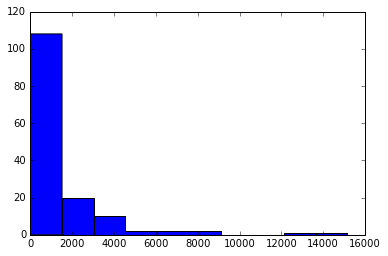

In [118]:
plt.hist(df['to_messages'])
df[df['to_messages'] == 0]
df[df['to_messages'] > 12000]

(array([ 136.,    6.,    1.,    1.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([     0. ,   1436.8,   2873.6,   4310.4,   5747.2,   7184. ,
          8620.8,  10057.6,  11494.4,  12931.2,  14368. ]),
 <a list of 10 Patch objects>)

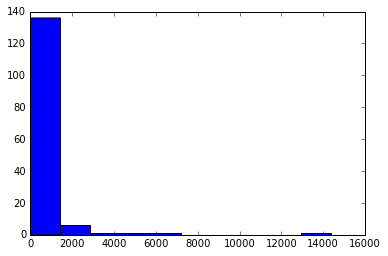

In [121]:
plt.hist(df['from_messages'])

(145, 21)

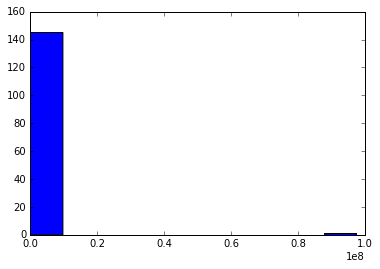

In [122]:
plt.hist(df['bonus'])
df[df['bonus'] > 8e+7]
### outlier 'TOTAL' found
df = df[df.index != 'TOTAL']
df.shape

,poi,email_adress,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,salary,bonus,long_term_incentive,...,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
FREVERT MARK A,False,nan,3275.0,21.0,242.0,6.0,2979.0,1060932.0,2000000.0,1617011.0,...,6426990.0,2000000.0,7427621.0,86987.0,0.0,17252530.0,10433518.0,4188667.0,0.0,14622185.0
LAY KENNETH L,True,nan,4273.0,36.0,123.0,16.0,2411.0,1072321.0,7000000.0,3600000.0,...,202911.0,81525000.0,10359729.0,99832.0,0.0,103559793.0,34348384.0,14761694.0,0.0,49110078.0
SKILLING JEFFREY K,True,nan,3627.0,108.0,88.0,30.0,2042.0,1111258.0,5600000.0,1920000.0,...,0.0,0.0,22122.0,29336.0,0.0,8682716.0,19250000.0,6843672.0,0.0,26093672.0


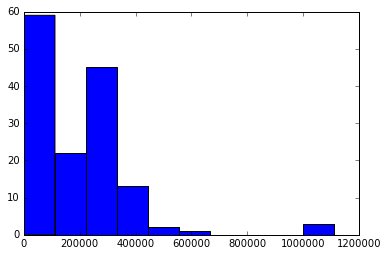

In [123]:
plt.hist(df['salary'])
df[df['salary'] > 1000000]

,poi,email_adress,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,salary,bonus,long_term_incentive,...,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
LAY KENNETH L,True,nan,4273.0,36.0,123.0,16.0,2411.0,1072321.0,7000000.0,3600000.0,...,202911.0,81525000.0,10359729.0,99832.0,0.0,103559793.0,34348384.0,14761694.0,0.0,49110078.0
WHITE JR THOMAS E,False,nan,0.0,0.0,0.0,0.0,0.0,317543.0,450000.0,0.0,...,0.0,0.0,1085463.0,81353.0,0.0,1934359.0,1297049.0,13847074.0,0.0,15144123.0


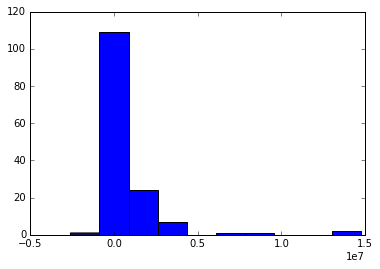

In [124]:
plt.hist(df['restricted_stock'])
df[df['restricted_stock'] > 1e+07]

,poi,email_adress,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,salary,bonus,long_term_incentive,...,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,False,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0


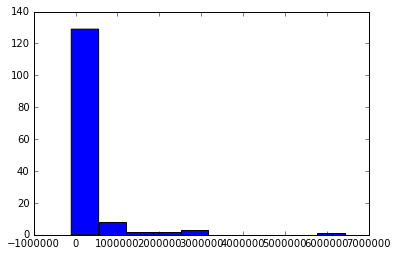

In [148]:
### Another outlier
plt.hist(df['deferral_payments'])
df[df['deferral_payments'] < 0]

df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())]

In [155]:
df[np.abs( df['deferral_payments'] - df['deferral_payments'].mean() ) > (2 * df['deferral_payments'].std())]

,poi,email_adress,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,salary,bonus,long_term_incentive,...,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
ALLEN PHILLIP K,False,nan,2902.0,2195.0,47.0,65.0,1407.0,201955.0,4175000.0,304805.0,...,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,1729541.0,126027.0,-126027.0,1729541.0
BELDEN TIMOTHY N,True,nan,7991.0,484.0,228.0,108.0,5521.0,213999.0,5249999.0,0.0,...,2144013.0,0.0,210698.0,17355.0,0.0,5501630.0,953136.0,157569.0,0.0,1110705.0
FREVERT MARK A,False,nan,3275.0,21.0,242.0,6.0,2979.0,1060932.0,2000000.0,1617011.0,...,6426990.0,2000000.0,7427621.0,86987.0,0.0,17252530.0,10433518.0,4188667.0,0.0,14622185.0
HAEDICKE MARK E,False,nan,4009.0,1941.0,180.0,61.0,1847.0,374125.0,1150000.0,983346.0,...,2157527.0,0.0,52382.0,76169.0,0.0,3859065.0,608750.0,524169.0,-329825.0,803094.0
HORTON STANLEY C,False,nan,2350.0,1073.0,44.0,15.0,1074.0,0.0,0.0,0.0,...,3131860.0,0.0,0.0,0.0,0.0,3131860.0,5210569.0,2046079.0,0.0,7256648.0
HUMPHREY GENE E,False,nan,128.0,17.0,10.0,17.0,119.0,130724.0,0.0,0.0,...,2964506.0,0.0,0.0,4994.0,0.0,3100224.0,2282768.0,0.0,0.0,2282768.0
MEYER ROCKFORD G,False,nan,232.0,28.0,0.0,0.0,22.0,0.0,0.0,0.0,...,1848227.0,0.0,0.0,0.0,0.0,1848227.0,493489.0,462384.0,0.0,955873.0


In [126]:
df.corr()

,poi,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
poi,1.000000,0.110006,-0.033302,0.191549,0.130319,0.242105,0.341365,0.360262,0.258301,-0.275364,-0.038267,0.220405,0.170153,0.206580,-0.120001,0.242922,0.388241,0.249352,-0.021229,0.384127
to_messages,0.110006,1.000000,0.508507,0.619246,0.605648,0.881801,0.398528,0.521090,0.194440,-0.123114,0.125653,0.115804,0.106260,0.245761,-0.167925,0.198289,0.087432,0.161506,-0.027399,0.120161
from_messages,-0.033302,0.508507,1.000000,0.254357,0.609788,0.302114,0.145204,0.175334,0.056255,-0.015389,0.029638,-0.019364,-0.054407,0.156845,-0.079187,0.009462,-0.022549,0.023625,-0.022293,-0.010440
from_poi_to_this_person,0.191549,0.619246,0.254357,1.000000,0.498461,0.733624,0.409115,0.641847,0.268699,-0.196121,0.218030,0.100835,0.160243,0.150603,-0.166168,0.216524,0.127330,0.127348,-0.046404,0.139471
from_this_person_to_poi,0.130319,0.605648,0.609788,0.498461,1.000000,0.525159,0.208268,0.449277,0.157778,-0.005673,0.003004,-0.009492,-0.049356,0.135980,-0.097972,0.062637,0.003595,0.060660,-0.022139,0.023054
shared_receipt_with_poi,0.242105,0.881801,0.302114,0.733624,0.525159,1.000000,0.513837,0.665955,0.281581,-0.237787,0.211568,0.137603,0.180648,0.290408,-0.194331,0.254861,0.128269,0.183134,-0.020590,0.158576
salary,0.341365,0.398528,0.145204,0.409115,0.208268,0.513837,1.000000,0.650542,0.561376,-0.331188,0.244706,0.387150,0.542620,0.364642,-0.299079,0.511042,0.451063,0.539554,-0.087890,0.523125
bonus,0.360262,0.521090,0.175334,0.641847,0.449277,0.665955,0.650542,1.000000,0.498905,-0.332501,0.175580,0.432251,0.383030,0.248291,-0.174556,0.559937,0.417708,0.424896,-0.042943,0.462567
long_term_incentive,0.258301,0.194440,0.056255,0.268699,0.157778,0.281581,0.561376,0.498905,1.000000,-0.297296,0.120817,0.402007,0.534276,0.100261,-0.156171,0.520845,0.400307,0.344077,-0.038591,0.422664
deferred_income,-0.275364,-0.123114,-0.015389,-0.196121,-0.005673,-0.237787,-0.331188,-0.332501,-0.297296,1.000000,-0.543713,-0.025548,-0.265475,-0.043265,0.075015,-0.104391,-0.269461,-0.127315,0.047700,-0.245786


In [139]:
df.loc['BELFER ROBERT', features_finace]
df[df['deferral_payments']<0]

,poi,email_adress,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,salary,bonus,long_term_incentive,...,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,False,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0


In [158]:
### Build new features
### As mentioned in the mini projects before, there some ratio features based on
### email-sending data may help improving algorithm's performance

df['received_from_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages']
df['sent_to_poi_ratio'] = df['from_this_person_to_poi'] / df['from_messages']
df['shared_receipt_with_poi_ratio'] = df['shared_receipt_with_poi'] / df['to_messages']
df.shape

/Users/ted/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ted/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ted/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

(145, 25)

In [163]:
del(df['recieved_from_poi_ratio'])
df.shape

(145, 24)

(array([ 36.,  20.,  14.,   6.,   4.,   3.,   1.,   1.,   0.,   1.]),
 array([ 0.        ,  0.0217341 ,  0.04346821,  0.06520231,  0.08693642,
         0.10867052,  0.13040462,  0.15213873,  0.17387283,  0.19560694,
         0.21734104]),
 <a list of 10 Patch objects>)

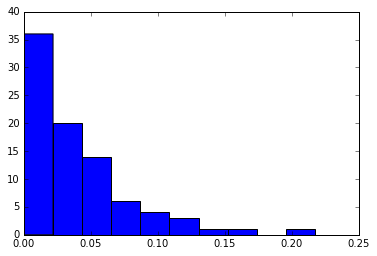

In [166]:
plt.hist(df.received_from_poi_ratio.dropna())

(array([  0.5,   2.5,   4.5,   6.5,   8.5,  10.5,  12.5,  14.5,  16.5,
         18.5,  20.5,  22.5]), <a list of 12 Text yticklabel objects>)

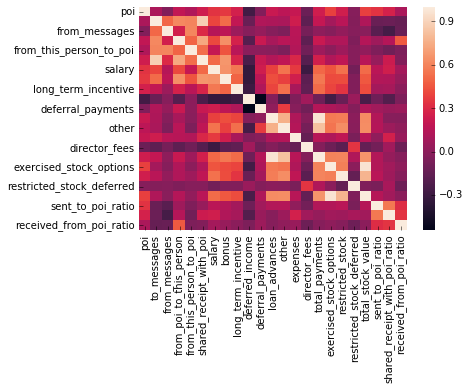

In [175]:
### Correlation of each features showed by heatmap
import seaborn as sns

sns.heatmap(df.corr())
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [176]:
# Feature Transformation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectFpr, f_classif
from sklearn.decomposition import PCA
# Cross Validation
from sklearn.cross_validation import cross_val_score, StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier,\
                             GradientBoostingClassifier, RandomForestClassifier
# Evaluation
from pandas import crosstab
from sklearn.metrics import classification_report, f1_score,\
                            precision_score, recall_score
    


/Users/ted/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ted/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [179]:
# Update column definition
features_all = features_email + features_finace
features_email_new = ['received_from_poi_ratio', 'sent_to_poi_ratio',
               'shared_receipt_with_poi_ratio']
features_all_new = features_all + features_email_new

# Define features and label
X = df[features_all_new]
y = df['poi']

# Splitter for grid search
splitter = StratifiedShuffleSplit(y, n_iter=10, random_state=201603)
# Splitter for evaluation
splitter_ = StratifiedShuffleSplit(y, n_iter=100, random_state=42)


def evaluate(model, name):
    """
    Evaluates model by cross validation
    """
    

['email_adress', 'to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 'received_from_poi_ratio', 'sent_to_poi_ratio', 'shared_receipt_with_poi_ratio']


In [230]:
### Test modeling
def check_test_set(model, x, y):
    y_pred = model.predict(x)
    '''
    print crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
    print ''
    print classification_report(y, y_pred), '\n'
    '''
    return {'precision' : round(precision_score(y, y_pred), 3),
            'recall' : round(recall_score(y, y_pred), 3),
            'f1' : round(f1_score(y, y_pred), 3)
           }


'''
### Make pipeline
'''
#### Original features
pipe_org = make_pipeline(Imputer(strategy='median', axis=0),\
                         GaussianNB())

#### Features selected by p-value
pipe_fpr = make_pipeline(Imputer(strategy='median', axis=0),\
                         SelectFpr(f_classif, alpha = 0.05),\
                         GaussianNB())

#### Features selected by PCA
n_pca = 14
pipe_pca = make_pipeline(Imputer(strategy='median', axis=0),\
                         PCA(n_components = n_pca, whiten = True),\
                         GaussianNB())

'''
### Train and cross validation
'''
sss = StratifiedShuffleSplit(df['poi'], n_iter = 10,
                            test_size = 0.3, random_state = 1024)

result_org = DataFrame(columns = ['precision', 'recall', 'f1'])
result_fpr = DataFrame(columns = ['precision', 'recall', 'f1'])
result_pca = DataFrame(columns = ['precision', 'recall', 'f1'])

for train_idx, test_idx in sss:
    # Splite into train and test dataset
    X_train = df.iloc[train_idx][features_all_new]
    X_test = df.iloc[test_idx][features_all_new]
    Y_train = df.iloc[train_idx]['poi']
    Y_test = df.iloc[test_idx]['poi']
    
    pipe_org.fit(X_train, Y_train)
    pipe_fpr.fit(X_train, Y_train)
    pipe_pca.fit(X_train, Y_train)
    
    result_org = result_org.append(check_test_set(pipe_org, X_test, Y_test),
                                   ignore_index = True)
    result_fpr = result_fpr.append(check_test_set(pipe_fpr, X_test, Y_test),
                                   ignore_index = True)
    result_pca = result_pca.append(check_test_set(pipe_pca, X_test, Y_test),
                                   ignore_index = True)
    
for result in [result_org, result_fpr, result_pca]:
    print '**************************\n','[mean]:'
    print np.mean(result, axis = 0)
    print '[standard]:'
    print np.std(result, axis = 0), '\n**************************'

**************************
[mean]:
precision    0.2069
recall       0.6400
f1           0.2954
dtype: float64
[standard]:
precision    0.084475
recall       0.233238
f1           0.098280
dtype: float64 
**************************
**************************
[mean]:
precision    0.3549
recall       0.3400
f1           0.3218
dtype: float64
[standard]:
precision    0.196728
recall       0.180000
f1           0.157937
dtype: float64 
**************************
**************************
[mean]:
precision    0.3632
recall       0.3800
f1           0.3226
dtype: float64
[standard]:
precision    0.255157
recall       0.166132
f1           0.106461
dtype: float64 
**************************
